 Seattle - Airbnb Data Set.



In order to get a better grip over the Airbnb data set. Lets wrangle to get a better understanding, and prepare the data set.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

import numba
from numba import cuda

#### Loading the Datasets

In [2]:
airbnb_listing_df = pd.read_csv('Data/Airbnb_Seattle/seattle_airbnb_listing.csv')

airbnb_neighbourhood_df = pd.read_csv('Data/Airbnb_Seattle/seattle_airbnb_neighbourhoods.csv')

airbnb_neighbourhood_geojson_df = pd.read_csv('Data/Airbnb_Seattle/seattle_airbnb_neighbourhoods_geojson.csv')

airbnb_reviews_df = pd.read_csv('Data/Airbnb_Seattle/seattle_airbnb_reviews.csv')

#### Finding the Rows and Columns in the Dataframes

In [3]:
airbnb_listing_df.shape

(8740, 16)

In [4]:
airbnb_neighbourhood_df.shape

(90, 2)

In [5]:
airbnb_neighbourhood_geojson_df.shape

(90, 2)

In [6]:
airbnb_reviews_df.shape

(373096, 2)

#### Examning the dataframes

In [7]:
airbnb_listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2318,"Casa Madrona - Urban Oasis, 1 block from the P...",2536,Megan,Central Area,Madrona,47.610819,-122.290816,Entire home/apt,296,4,20,9/18/2018,0.16,3,345
1,4291,Sunrise in Seattle Master Suite,35749,Jess & Joey,Other neighborhoods,Roosevelt,47.687801,-122.313427,Private room,82,2,63,10/6/2018,0.96,5,365
2,5682,"Cozy Studio, min. to downtown -WiFi",8993,Maddy,Delridge,South Delridge,47.523979,-122.359891,Entire home/apt,48,3,461,11/2/2018,4.37,1,24
3,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.654109,-122.337605,Entire home/apt,90,2,134,10/21/2018,1.18,3,287
4,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.550620,-122.320135,Private room,65,2,130,9/9/2018,1.29,5,336


In [8]:
airbnb_neighbourhood_df.head()

,neighbourhood_group,neighbourhood
0,Ballard,Adams
1,Ballard,Loyal Heights
2,Ballard,Sunset Hill
3,Ballard,West Woodland
4,Ballard,Whittier Heights


In [9]:
airbnb_neighbourhood_geojson_df.head()

,neighbourhood_group,neighbourhood
0,Ballard,Adams
1,Ballard,Loyal Heights
2,Ballard,Sunset Hill
3,Ballard,West Woodland
4,Ballard,Whittier Heights


In [10]:
airbnb_reviews_df.head()

,listing_id,date
0,2318,2008-09-15
1,2318,2017-01-10
2,2318,2017-04-01
3,2318,2017-04-25
4,2318,2017-06-18


#### Testing Numba Library for GPU processing

In [11]:
print(cuda.gpus)

<Managed Device 0>


In [12]:
#thread id in 1D block

# blockwidth = number of threads per block
bw = cuda.blockDim
print(bw)


<class 'numba.cuda.stubs.blockDim'>


In [35]:
no_nulls = set(airbnb_listing_df.columns[np.sum(airbnb_listing_df.isnull()) == 0])

no_nulls

{'availability_365',
 'calculated_host_listings_count',
 'host_id',
 'host_name',
 'id',
 'latitude',
 'longitude',
 'minimum_nights',
 'name',
 'neighbourhood',
 'neighbourhood_group',
 'number_of_reviews',
 'price',
 'room_type'}

#### A Set Columns Names missing more than 10% of their values missing.

In [16]:
set(airbnb_listing_df.columns[airbnb_listing_df.isnull().mean() > .1])

{'last_review', 'reviews_per_month'}

In [17]:
airbnb_listing_df.isnull().mean()

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.119908
reviews_per_month                 0.120023
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

#### Histogram Distribution of Neighbourhood Groups

Other neighborhoods    1641
Downtown               1509
Capitol Hill           1024
Central Area            762
Queen Anne              645
Ballard                 492
West Seattle            460
Rainier Valley          421
Beacon Hill             335
Cascade                 325
Delridge                247
University District     247
Northgate               214
Magnolia                164
Lake City               155
Seward Park              83
Interbay                 16
Name: neighbourhood_group, dtype: int64
Other neighborhoods    96.529412
Downtown               88.764706
Capitol Hill           60.235294
Central Area           44.823529
Queen Anne             37.941176
Ballard                28.941176
West Seattle           27.058824
Rainier Valley         24.764706
Beacon Hill            19.705882
Cascade                19.117647
Delridge               14.529412
University District    14.529412
Northgate              12.588235
Magnolia                9.647059
Lake City             

Text(0.5, 1.0, '# of Airbnb Listings in Neighbourhood Groups')

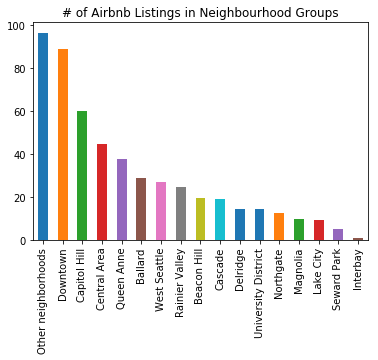

In [18]:
ngh_grp = airbnb_listing_df.neighbourhood_group.value_counts().sort_values(ascending = False)
print(ngh_grp)

print(ngh_grp/ngh_grp.shape[0])

(ngh_grp/ngh_grp.shape[0]).plot(kind = "bar")
plt.title("# of Airbnb Listings in Neighbourhood Groups")

#### Understanding the Listing Data
###### List of neighbourhoods with highest Airbnb reviews in Seattle,WA

In [19]:
areas_and_reviews = airbnb_listing_df.groupby(by = ["number_of_reviews"])["neighbourhood_group","neighbourhood"].max()[::-1]
print(areas_and_reviews)


print(airbnb_listing_df.neighbourhood_group.unique().tolist())


                   neighbourhood_group              neighbourhood
number_of_reviews                                                
717                           Downtown     International District
703                           Downtown     International District
683                            Ballard           Whittier Heights
636                            Ballard           Whittier Heights
513                     Rainier Valley                Mount Baker
481                            Ballard                      Adams
479                            Ballard                      Adams
478                           Downtown  Central Business District
477                Other neighborhoods                    Fremont
476                       Central Area      Harrison/Denny-Blaine
461                           Delridge             South Delridge
453                           Downtown                   Belltown
448                Other neighborhoods                    Fremont
446       

#### Number of Reviews in Neighbourhood Groups  

In [129]:
areas_and_reviews_2 = airbnb_listing_df.groupby(by = ["neighbourhood_group"])["number_of_reviews"].sum()[::-1].sort_values(ascending = False)

neighbourhood_group
Other neighborhoods    71443
Downtown               51333
Capitol Hill           50031
Central Area           40932
Queen Anne             28131
Ballard                26850
West Seattle           20644
Rainier Valley         19982
Beacon Hill            16947
Delridge               10054
Cascade                 7998
Northgate               7537
University District     6239
Magnolia                5676
Lake City               5181
Seward Park             3917
Interbay                 939
Name: number_of_reviews, dtype: int64


Text(0.5, 1.0, '# of Airbnb Reviews in Seattle Neighbourhood Groups')

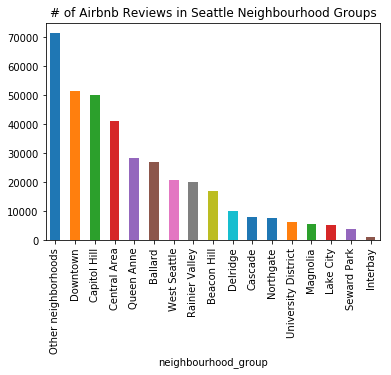

In [130]:
print(areas_and_reviews_2)

areas_and_reviews_2.plot(kind = "bar")
plt.title("# of Airbnb Reviews in Seattle Neighbourhood Groups")

#### Average Price of Airbnb Listing in Seattle Neighbourhood Groups

In [131]:
areas_and_prices = airbnb_listing_df.groupby(by = ["neighbourhood_group"])["price"].mean()[::-1].sort_values(ascending = False)

neighbourhood_group
Downtown               204.373095
Queen Anne             192.838760
Cascade                179.384615
Magnolia               164.676829
Central Area           154.694226
Seward Park            152.831325
West Seattle           149.571739
Capitol Hill           143.418945
Ballard                142.504065
Other neighborhoods    130.806825
Lake City              121.567742
Rainier Valley         120.344418
University District    113.242915
Beacon Hill            108.059701
Interbay               104.625000
Northgate              103.070093
Delridge                97.113360
Name: price, dtype: float64


Text(0.5, 1.0, 'Average Price of Airbnb Listing in Seattle Neighbour Groups')

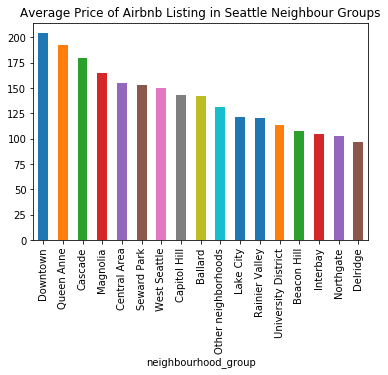

In [108]:
print(areas_and_prices)

areas_and_prices.plot(kind = "bar")
plt.title("Average Price of Airbnb Listing in Seattle Neighbour Groups")

#### Average Prices and Number of Reviews on Airbnb Listings in Seattle Neighbour Groups

In [24]:
price_and_review = pd.concat([areas_and_reviews_2,areas_and_prices], axis = 1, sort = True).sort_values(by="number_of_reviews", ascending =  False)

In [25]:
print(price_and_review)


                     number_of_reviews       price
Other neighborhoods              71443  130.806825
Downtown                         51333  204.373095
Capitol Hill                     50031  143.418945
Central Area                     40932  154.694226
Queen Anne                       28131  192.838760
Ballard                          26850  142.504065
West Seattle                     20644  149.571739
Rainier Valley                   19982  120.344418
Beacon Hill                      16947  108.059701
Delridge                         10054   97.113360
Cascade                           7998  179.384615
Northgate                         7537  103.070093
University District               6239  113.242915
Magnolia                          5676  164.676829
Lake City                         5181  121.567742
Seward Park                       3917  152.831325
Interbay                           939  104.625000


#### Reviews per Month of different Neighbourhood Groups in Seattle


In [188]:
reviews_per_month = airbnb_listing_df.groupby(by = ["neighbourhood_group"])["reviews_per_month"].sum()[::-1].sort_values(ascending = False)

In [189]:
reviews_per_month

neighbourhood_group
Other neighborhoods    3344.85
Downtown               2689.21
Capitol Hill           2499.18
Central Area           2102.11
Queen Anne             1458.07
Ballard                1167.25
West Seattle           1050.06
Rainier Valley          985.72
Beacon Hill             891.24
Delridge                597.68
Cascade                 530.29
Northgate               443.68
Magnolia                360.19
University District     307.75
Lake City               283.34
Seward Park             166.93
Interbay                 58.38
Name: reviews_per_month, dtype: float64

#### Finding the neighbourhoods associated with Other Neighbourhood Groups

In [157]:
neighbourhoods = airbnb_listing_df.groupby(by = ["neighbourhood_group"])["neighbourhood"]
#[airbnb_listing_df.neighbourhood_group == "Other neighborhoods"]

In [158]:
other_neighbourhood_list = []

for key, item in neighbourhoods:
    if key == "Other neighborhoods":
        print(key,item)
        other_neighborhoods = item
        other_neighbourhood_list.append(item.tolist())

Other neighborhoods 1                    Roosevelt
3                  Wallingford
4                   Georgetown
8                  Wallingford
13                 Wallingford
15                  Green Lake
16                  Green Lake
17                  Green Lake
31                 Wallingford
33                 Wallingford
34                    Wedgwood
35                  Windermere
37                    Wedgwood
38               Phinney Ridge
41                    Wedgwood
42                    Wedgwood
47                  Green Lake
48                  Green Lake
52                     Fremont
54                     Fremont
55                 Wallingford
56                  Green Lake
76               Phinney Ridge
77                  View Ridge
80                  Crown Hill
84                     Fremont
85               Phinney Ridge
87               Phinney Ridge
90                  Georgetown
94                 Wallingford
                 ...          
8580             Ph

##### List of the neighbourhoods in Seattle associated with Other Neighbourhood Groups

In [159]:
other_neighborhoods.unique().tolist()

['Roosevelt',
 'Wallingford',
 'Georgetown',
 'Green Lake',
 'Wedgwood',
 'Windermere',
 'Phinney Ridge',
 'Fremont',
 'View Ridge',
 'Crown Hill',
 'North Beach/Blue Ridge',
 'Greenwood',
 'Ravenna',
 'Broadview',
 'Bitter Lake',
 'Bryant',
 'Industrial District',
 'Laurelhurst',
 'South Park']

In [160]:
other_neighbourhood_set = set(other_neighbourhood_list[0])

other_neighbourhood_set

{'Bitter Lake',
 'Broadview',
 'Bryant',
 'Crown Hill',
 'Fremont',
 'Georgetown',
 'Green Lake',
 'Greenwood',
 'Industrial District',
 'Laurelhurst',
 'North Beach/Blue Ridge',
 'Phinney Ridge',
 'Ravenna',
 'Roosevelt',
 'South Park',
 'View Ridge',
 'Wallingford',
 'Wedgwood',
 'Windermere'}

#### Number of Reviews in all the neighbourhoods in Seattle

In [161]:
areas_and_reviews_3 = airbnb_listing_df.groupby(by = ["neighbourhood"])["number_of_reviews"].sum()[::-1].sort_values(ascending = False)

In [185]:
areas_and_reviews_3

neighbourhood
Broadway                     36780
Belltown                     21987
Minor                        19078
Fremont                      16246
Wallingford                  14994
First Hill                   10496
North Beacon Hill            10144
Stevens                       8742
Columbia City                 8145
Lower Queen Anne              8080
Greenwood                     8009
Adams                         7742
West Woodland                 7539
East Queen Anne               7228
Atlantic                      6927
North Queen Anne              6907
Mann                          6756
University District           6239
West Queen Anne               5916
Green Lake                    5756
Central Business District     5650
Phinney Ridge                 5641
Pike-Market                   5525
Mount Baker                   5445
North Admiral                 5385
Mid-Beacon Hill               5001
Loyal Heights                 4957
Ravenna                       4479
Whitti

#### Number of Reviews in these neighbourhoods that make up Other Neighbourhood Group

In [163]:
areas_and_reviews_3.loc[other_neighbourhood_set]

neighbourhood
Crown Hill                 2080
Laurelhurst                 837
Bitter Lake                1085
Industrial District         161
Georgetown                 1581
Ravenna                    4479
Broadview                  1799
Greenwood                  8009
North Beach/Blue Ridge      965
South Park                  666
Roosevelt                  2847
Bryant                     1765
View Ridge                 1000
Wallingford               14994
Green Lake                 5756
Wedgwood                    975
Windermere                  557
Fremont                   16246
Phinney Ridge              5641
Name: number_of_reviews, dtype: int64

#### Prices of Airbnb in all the Neighbourhoods in Seattle

In [164]:
areas_and_prices_2 = airbnb_listing_df.groupby(by = ["neighbourhood"])["price"].mean()[::-1].sort_values(ascending = False)

In [165]:
areas_and_prices_2

neighbourhood
Harrison/Denny-Blaine        330.027778
Central Business District    250.503676
South Lake Union             245.850000
West Queen Anne              244.689394
Pike-Market                  236.748768
Portage Bay                  228.533333
Briarcliff                   212.478261
Belltown                     195.643911
Pioneer Square               193.537313
Madison Park                 189.807692
Sunset Hill                  189.290909
Industrial District          186.333333
Madrona                      185.619048
First Hill                   182.413249
North Beach/Blue Ridge       181.266667
Fauntleroy                   181.062500
Alki                         180.870000
North Queen Anne             180.783439
Cedar Park                   179.727273
East Queen Anne              179.634483
Lower Queen Anne             178.445498
Holly Park                   172.250000
Lawton Park                  165.146341
Green Lake                   160.625000
International District    

#### Prices of Airbnb in the Neighbourhoods that make up Other Neighbourhoods

In [166]:
areas_and_prices_2.loc[other_neighbourhood_set]

neighbourhood
Crown Hill                107.023810
Laurelhurst               134.235294
Bitter Lake                88.585366
Industrial District       186.333333
Georgetown                117.826087
Ravenna                   116.925926
Broadview                 110.450000
Greenwood                 109.920398
North Beach/Blue Ridge    181.266667
South Park                 87.666667
Roosevelt                 115.035714
Bryant                    119.272727
View Ridge                124.272727
Wallingford               139.724458
Green Lake                160.625000
Wedgwood                  100.342105
Windermere                157.545455
Fremont                   144.244966
Phinney Ridge             131.157534
Name: price, dtype: float64

#### Dropping Other  Neighbourhoods and adding the individual neighbourhoods in that Group

#### Reviews

In [167]:
areas_and_reviews_cleaned = areas_and_reviews_2.copy(deep =True)

In [168]:

areas_and_reviews_cleaned.drop("Other neighborhoods", inplace = True)
areas_and_reviews_cleaned

neighbourhood_group
Downtown               51333
Capitol Hill           50031
Central Area           40932
Queen Anne             28131
Ballard                26850
West Seattle           20644
Rainier Valley         19982
Beacon Hill            16947
Delridge               10054
Cascade                 7998
Northgate               7537
University District     6239
Magnolia                5676
Lake City               5181
Seward Park             3917
Interbay                 939
Name: number_of_reviews, dtype: int64

In [169]:
areas_and_reviews_cleaned = areas_and_reviews_cleaned.append(areas_and_reviews_3.loc[other_neighbourhood_set]).sort_values(ascending = False)

In [170]:
areas_and_reviews_cleaned

Downtown                  51333
Capitol Hill              50031
Central Area              40932
Queen Anne                28131
Ballard                   26850
West Seattle              20644
Rainier Valley            19982
Beacon Hill               16947
Fremont                   16246
Wallingford               14994
Delridge                  10054
Greenwood                  8009
Cascade                    7998
Northgate                  7537
University District        6239
Green Lake                 5756
Magnolia                   5676
Phinney Ridge              5641
Lake City                  5181
Ravenna                    4479
Seward Park                3917
Roosevelt                  2847
Crown Hill                 2080
Broadview                  1799
Bryant                     1765
Georgetown                 1581
Bitter Lake                1085
View Ridge                 1000
Wedgwood                    975
North Beach/Blue Ridge      965
Interbay                    939
Laurelhu

#### Prices 

In [171]:
areas_and_prices_cleaned = areas_and_prices.copy(deep =True)

In [172]:
areas_and_prices_cleaned.drop("Other neighborhoods", inplace = True)

In [174]:
areas_and_prices_cleaned

neighbourhood_group
Downtown               204.373095
Queen Anne             192.838760
Cascade                179.384615
Magnolia               164.676829
Central Area           154.694226
Seward Park            152.831325
West Seattle           149.571739
Capitol Hill           143.418945
Ballard                142.504065
Lake City              121.567742
Rainier Valley         120.344418
University District    113.242915
Beacon Hill            108.059701
Interbay               104.625000
Northgate              103.070093
Delridge                97.113360
Name: price, dtype: float64

In [175]:
areas_and_prices_cleaned = areas_and_prices_cleaned.append(areas_and_prices_2.loc[other_neighbourhood_set]).sort_values(ascending = False)

In [176]:
areas_and_prices_cleaned 

Downtown                  204.373095
Queen Anne                192.838760
Industrial District       186.333333
North Beach/Blue Ridge    181.266667
Cascade                   179.384615
Magnolia                  164.676829
Green Lake                160.625000
Windermere                157.545455
Central Area              154.694226
Seward Park               152.831325
West Seattle              149.571739
Fremont                   144.244966
Capitol Hill              143.418945
Ballard                   142.504065
Wallingford               139.724458
Laurelhurst               134.235294
Phinney Ridge             131.157534
View Ridge                124.272727
Lake City                 121.567742
Rainier Valley            120.344418
Bryant                    119.272727
Georgetown                117.826087
Ravenna                   116.925926
Roosevelt                 115.035714
University District       113.242915
Broadview                 110.450000
Greenwood                 109.920398
B

#### Number of Reviews Per Month in all the neighbourhoods in Seattle

In [190]:
reviews_per_month_2 = airbnb_listing_df.groupby(by = ["neighbourhood"])["reviews_per_month"].sum()[::-1].sort_values(ascending = False)

In [191]:
reviews_per_month_2

neighbourhood
Broadway                     1695.70
Belltown                     1206.00
Minor                         999.09
Wallingford                   667.72
Fremont                       662.71
Stevens                       543.58
North Beacon Hill             522.24
First Hill                    470.34
Lower Queen Anne              463.04
Greenwood                     405.51
Columbia City                 391.89
North Queen Anne              373.54
Atlantic                      363.70
East Queen Anne               350.55
Adams                         349.21
Pike-Market                   338.14
Mann                          337.43
University District           307.75
West Woodland                 302.10
Central Business District     298.13
Phinney Ridge                 285.21
Green Lake                    279.99
West Queen Anne               270.94
North Admiral                 254.65
Alki                          249.08
Loyal Heights                 237.28
Mid-Beacon Hill         

#### Reviews Per Month in these neighbourhoods that make up Other Neighbourhood Group

In [193]:
reviews_per_month_2.loc[other_neighbourhood_set]

neighbourhood
Crown Hill                 90.25
Laurelhurst                40.83
Bitter Lake                74.43
Industrial District         7.94
Georgetown                 82.34
Ravenna                   197.86
Broadview                  84.16
Greenwood                 405.51
North Beach/Blue Ridge     44.44
South Park                 37.05
Roosevelt                 165.25
Bryant                     90.39
View Ridge                 40.39
Wallingford               667.72
Green Lake                279.99
Wedgwood                   57.87
Windermere                 30.51
Fremont                   662.71
Phinney Ridge             285.21
Name: reviews_per_month, dtype: float64

#### Dropping Other Neighbourhoods and adding the individual neighbourhoods in that Group

In [194]:
reviews_per_month_cleaned = reviews_per_month.copy(deep =True)

In [195]:
reviews_per_month_cleaned.drop("Other neighborhoods", inplace = True)

In [196]:
reviews_per_month_cleaned

neighbourhood_group
Downtown               2689.21
Capitol Hill           2499.18
Central Area           2102.11
Queen Anne             1458.07
Ballard                1167.25
West Seattle           1050.06
Rainier Valley          985.72
Beacon Hill             891.24
Delridge                597.68
Cascade                 530.29
Northgate               443.68
Magnolia                360.19
University District     307.75
Lake City               283.34
Seward Park             166.93
Interbay                 58.38
Name: reviews_per_month, dtype: float64

In [197]:
reviews_per_month_cleaned = reviews_per_month_cleaned.append(reviews_per_month_2.loc[other_neighbourhood_set]).sort_values(ascending = False)

In [198]:
reviews_per_month_cleaned

Downtown                  2689.21
Capitol Hill              2499.18
Central Area              2102.11
Queen Anne                1458.07
Ballard                   1167.25
West Seattle              1050.06
Rainier Valley             985.72
Beacon Hill                891.24
Wallingford                667.72
Fremont                    662.71
Delridge                   597.68
Cascade                    530.29
Northgate                  443.68
Greenwood                  405.51
Magnolia                   360.19
University District        307.75
Phinney Ridge              285.21
Lake City                  283.34
Green Lake                 279.99
Ravenna                    197.86
Seward Park                166.93
Roosevelt                  165.25
Bryant                      90.39
Crown Hill                  90.25
Broadview                   84.16
Georgetown                  82.34
Bitter Lake                 74.43
Interbay                    58.38
Wedgwood                    57.87
North Beach/Bl

#### Revised Reviews of Neighbourhood Groups and Prices of Airbnb in Seattle

#### Total Reviews

Text(0.5, 1.0, '# of Airbnb Reviews in Revised Seattle Neighbourhood Groups')

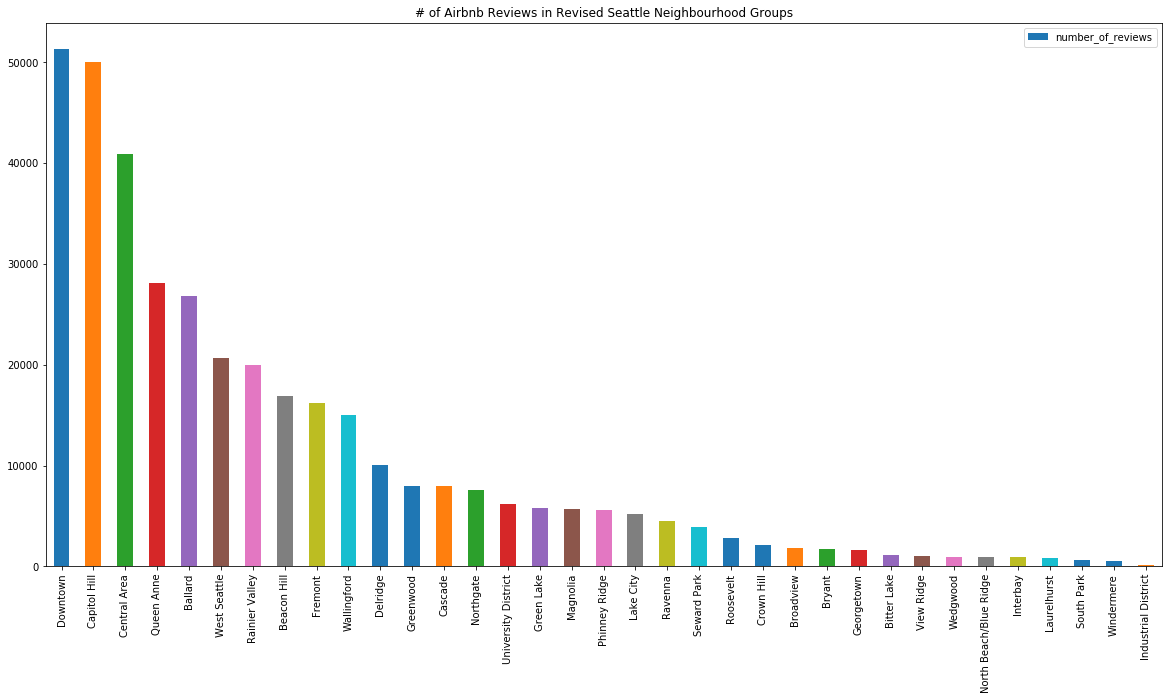

In [181]:
areas_and_reviews_cleaned.plot(kind = "bar", figsize = (20,10), legend = True)

plt.title("# of Airbnb Reviews in Revised Seattle Neighbourhood Groups")


#### Reviews Per Month

Text(0.5, 1.0, 'Reviews Per Month of Revised Airbnb Listing in Seattle Neighbourhood Groups')

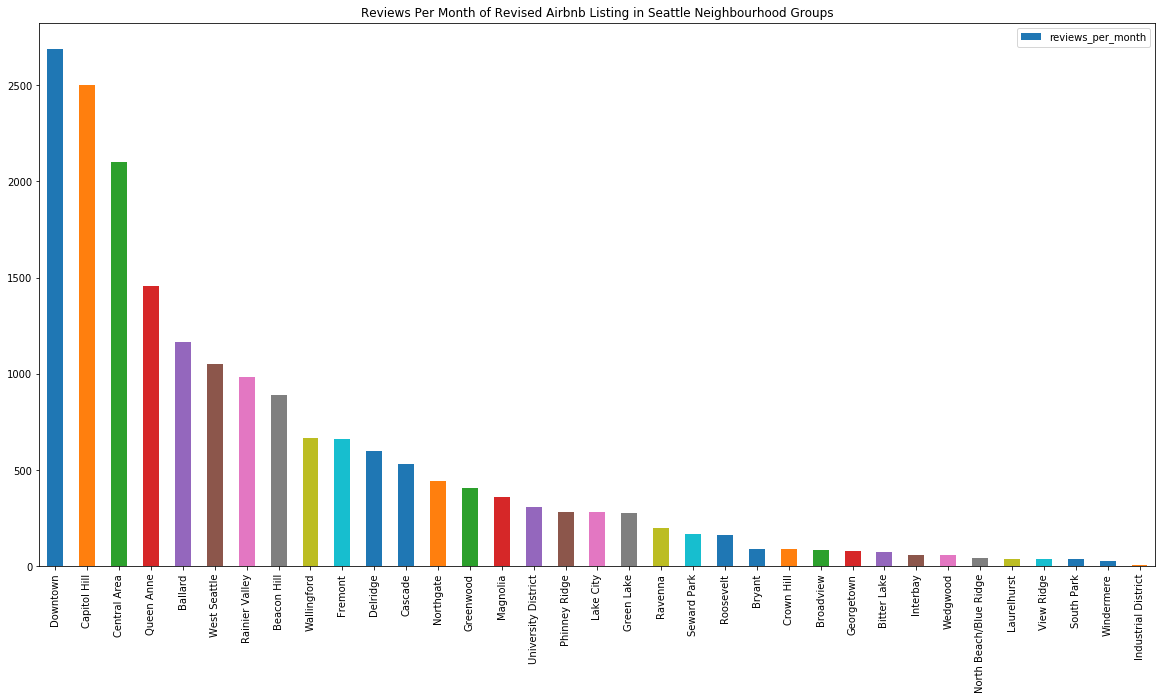

In [203]:
reviews_per_month_cleaned.plot(kind = "bar", figsize = (20,10), legend = True)
plt.title("Reviews Per Month of Revised Airbnb Listing in Seattle Neighbourhood Groups")

#### Airbnb Prices

Text(0.5, 1.0, 'Average Price of Revised Airbnb Listing in Seattle Neighbourhood Groups')

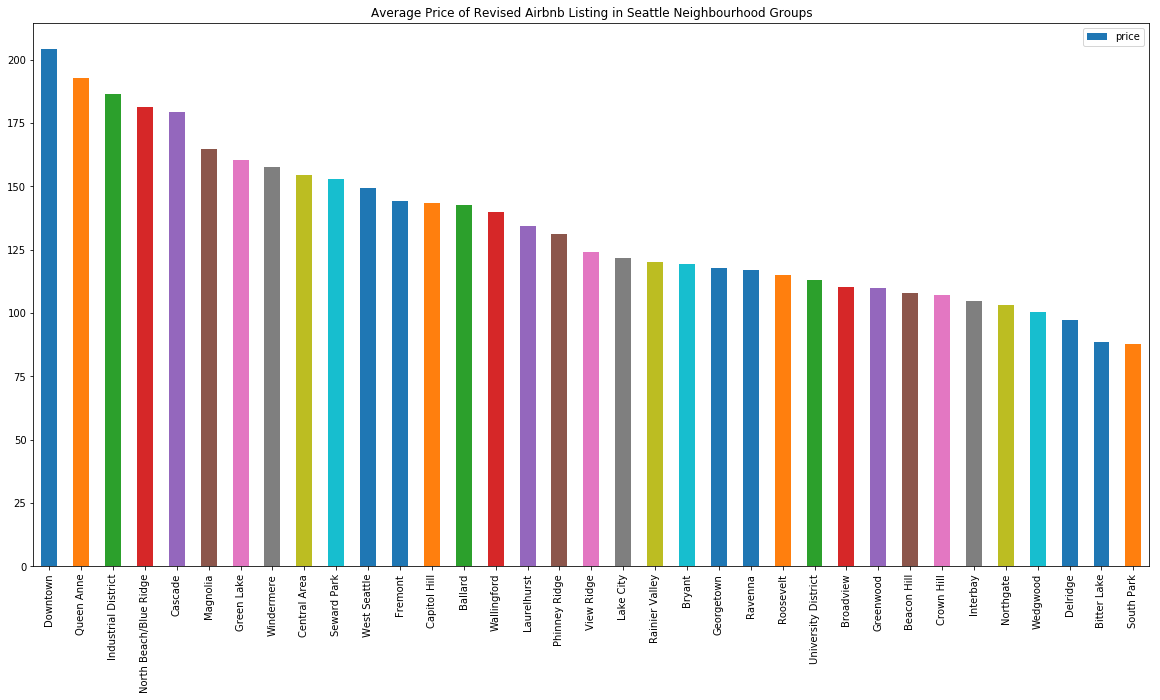

In [202]:
areas_and_prices_cleaned.plot(kind = "bar", figsize = (20,10), legend = True)
plt.title("Average Price of Revised Airbnb Listing in Seattle Neighbourhood Groups")

#### Airbnb Prices of the Highest Visited Neighbourhood Groups in Seattle

Text(0.5, 1.0, 'Average Price of Revised Airbnb Listing in Seattle Neighbourhoods with atleast 10,000 Reviews')

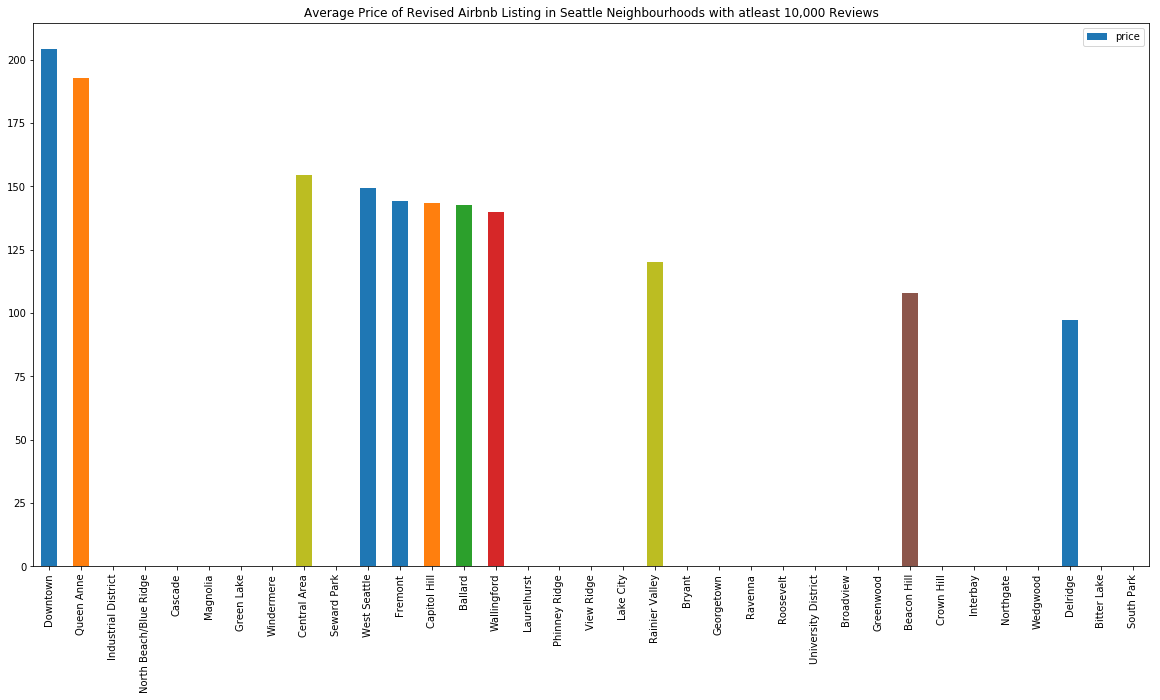

In [205]:
areas_and_prices_cleaned.where(areas_and_reviews_cleaned > 10000).plot(kind = "bar", figsize = (20,10), legend = True)
plt.title("Average Price of Revised Airbnb Listing in Seattle Neighbourhoods with atleast 10,000 Reviews")

##### Prices are spread out from the top to the bottom of the spectrum.